In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
train_Datagen = ImageDataGenerator(rescale= 1./255,
                                    shear_range= 0.2,
                                    zoom_range= 0.2,
                                    horizontal_flip= True)

In [4]:
training_set = train_Datagen.flow_from_directory('train',
                                                target_size= (128,128),
                                                batch_size= 32,
                                                class_mode= 'binary')

Found 40 images belonging to 2 classes.


In [5]:
test_Datagen = ImageDataGenerator(rescale= 1./255)

In [6]:
testing_set = test_Datagen.flow_from_directory('test',
                                              target_size= (128,128),
                                              batch_size= 32,
                                              class_mode= 'binary')

Found 20 images belonging to 2 classes.


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [8]:
model = Sequential()

In [9]:
model.add(Conv2D(filters = 64, 
                kernel_size = (5,5),
                activation = 'relu',
                padding = 'same',
                input_shape = [128 , 128, 3]))

In [10]:
model.add(MaxPool2D(pool_size = (2,2), strides = 2))

In [11]:
model.add(Conv2D(filters = 32,
                kernel_size = (5,5),
                activation = 'relu'))

In [12]:
model.add(MaxPool2D(pool_size = (2,2), strides = 2))

In [13]:
model.add(Flatten())

In [14]:
model.add(Dense(units = 128, 
               activation = 'relu'))
model.add(Dropout(0.4))

In [15]:
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dense(units = 1, activation = 'sigmoid'))

In [16]:
model.compile(optimizer= tensorflow.keras.optimizers.Adam(),
             loss= tensorflow.keras.losses.BinaryCrossentropy(), 
             metrics= ['accuracy'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 64)      4864      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 32)        51232     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 28800)             0         
                                                                 
 dense (Dense)               (None, 128)               3

In [18]:
model.fit(training_set, validation_data= testing_set, verbose=1, epochs= 50)

Epoch 1/50
2/2 [==============================] - 3s 762ms/step - loss: 0.7012 - accuracy: 0.6000 - val_loss: 1.3307 - val_accuracy: 0.5000
Epoch 2/50
2/2 [==============================] - 1s 397ms/step - loss: 1.3980 - accuracy: 0.4750 - val_loss: 0.7116 - val_accuracy: 0.5000
Epoch 3/50
2/2 [==============================] - 1s 1s/step - loss: 0.7128 - accuracy: 0.4750 - val_loss: 0.6949 - val_accuracy: 0.4500
Epoch 4/50
2/2 [==============================] - 1s 946ms/step - loss: 0.6893 - accuracy: 0.6500 - val_loss: 0.6943 - val_accuracy: 0.4500
Epoch 5/50
2/2 [==============================] - 1s 895ms/step - loss: 0.6887 - accuracy: 0.5250 - val_loss: 0.7030 - val_accuracy: 0.4000
Epoch 6/50
2/2 [==============================] - 1s 350ms/step - loss: 0.6891 - accuracy: 0.5000 - val_loss: 0.7164 - val_accuracy: 0.3000
Epoch 7/50
2/2 [==============================] - 1s 372ms/step - loss: 0.6735 - accuracy: 0.6000 - val_loss: 0.7339 - val_accuracy: 0.3000
Epoch 8/50
2/2 [=======

In [19]:
import numpy as np

In [20]:
from tensorflow.keras.preprocessing import image

In [21]:
test_img = image.load_img('cat.jpg', target_size=(128, 128, 3))

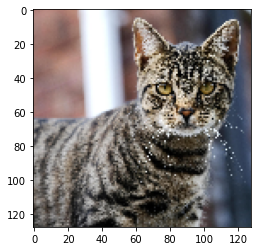

In [22]:
import matplotlib.pyplot as plt
plt.imshow(test_img)

In [23]:
test_img = image.img_to_array(test_img)
test_img = np.expand_dims(test_img, axis=0)
test_img = test_img/255

In [24]:
result = model.predict(test_img)

In [25]:
training_set.class_indices

{'cats': 0, 'dogs': 1}

In [26]:
result

array([[0.18541053]], dtype=float32)

In [27]:
if np.round(result[0][0]) == 1 :
    prediction = "It's Dog image.."
else :
    prediction = "It's Cat image.."
    
print(prediction)

It's Cat image..


In [28]:
test_img2 = image.load_img('dog.jpg', target_size=(128, 128, 3))

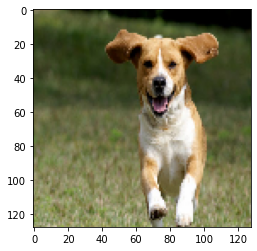

In [29]:
plt.imshow(test_img2)

In [30]:
test_img2 = image.img_to_array(test_img2)
test_img2 = np.expand_dims(test_img2, axis=0)
test_img2 = test_img2/255

In [31]:
result2 = model.predict(test_img2)

In [32]:
result2

array([[0.8717852]], dtype=float32)

In [33]:
if np.round(result2[0][0]) == 1 :
    predict = "It's Dog image.."
else :
    predict = "It's Cat image.."
    
print(predict)

It's Dog image..
